In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("Environment ready")


Environment ready


In [3]:
import pandas as pd

# Load the dataset (make sure the file name matches exactly)
df = pd.read_csv("StudentsPerformance.csv")

# Look at basic info
print(df.shape)
print(df.head())
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nSummary statistics (numeric):")
print(df.describe())

print("\nColumns:", df.columns.tolist())


(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Shape: (1000, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         

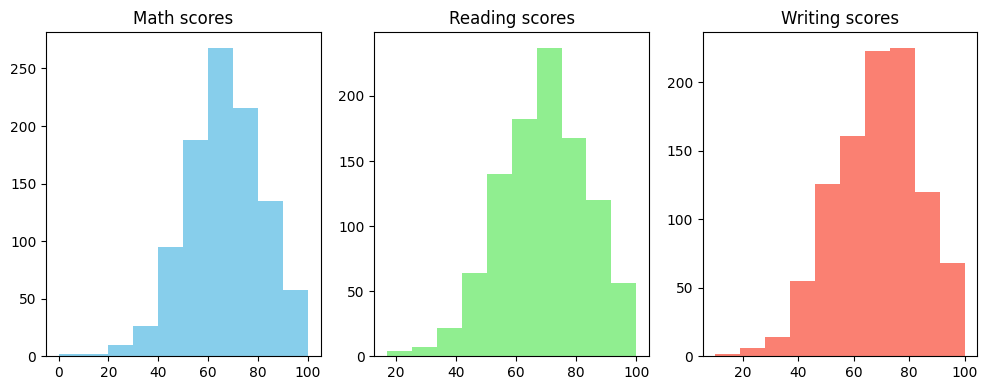

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(df["math score"], bins=10, color="skyblue")
plt.title("Math scores")

plt.subplot(1, 3, 2)
plt.hist(df["reading score"], bins=10, color="lightgreen")
plt.title("Reading scores")

plt.subplot(1, 3, 3)
plt.hist(df["writing score"], bins=10, color="salmon")
plt.title("Writing scores")

plt.tight_layout()
plt.show()


In [5]:
# Create an average score column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

print(df[["math score", "reading score", "writing score", "average_score"]].head())


   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


In [6]:
# Create a binary label: 1 = pass, 0 = fail
df["passed"] = (df["average_score"] >= 70).astype(int)

print(df["passed"].value_counts())
print(df[["average_score", "passed"]].head())


passed
0    541
1    459
Name: count, dtype: int64
   average_score  passed
0      72.666667       1
1      82.333333       1
2      92.666667       1
3      49.333333       0
4      76.333333       1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features (drop the label and any columns we don't want the model to see)
X = df.drop(columns=["passed", "average_score"])
y = df["passed"]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (800, 15)
Test shape: (200, 15)


In [8]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        92

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest accuracy:", acc_rf)


RandomForest accuracy: 0.98
